In [1]:
import cv2

In [2]:
cv2.__version__

'3.4.2'

In [3]:
import numpy as np

In [7]:
# Capture Image

webcam = cv2.VideoCapture(0)   #parameter passed is index of camera used
ret, frame = webcam.read()
print(ret)
webcam.release()

True


In [8]:
# Open Image in a new Window

cv2.namedWindow('opencv_1',cv2.WINDOW_NORMAL)
cv2.imshow('opencv_1', frame)
cv2.waitKey(10)
cv2.destroyAllWindows()

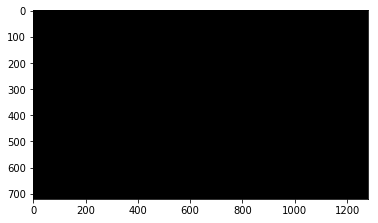

In [9]:
import matplotlib.pyplot as plt
plt.imshow(frame, cmap='gray')

In [10]:
# Write image to storage drive
cv2.imwrite('Screen Shot 2018-06-23 at 08.51.28.png', frame)

True

In [11]:
picture_BGR = cv2.imread('Screen Shot 2018-06-23 at 08.51.28.png',0)   # 0 for gray scale
cv2.imshow('gray scale',picture_BGR)
cv2.waitKey(10)
cv2.destroyAllWindows()

In [12]:
#To capture video
webcamm = cv2.VideoCapture(0)
cv2.namedWindow('open_cv_1', cv2.WINDOW_AUTOSIZE)

while True:
    ret, frame = webcamm.read()
    cv2.imshow('open_cv_1',frame)
    
    #press q for closing window
    # here 10 is millisecond
    if cv2.waitKey(10)==ord('q'):
        break
webcamm.release()
cv2.destroyAllWindows()

In [13]:
#face Detection

faceDetect = cv2.CascadeClassifier('xml/frontalface_alt.xml')   #frontalFace is inbuilt defined algo for detecting face
cam = cv2.VideoCapture(0)

cv2.namedWindow('Face', cv2.WINDOW_AUTOSIZE)

while True:
    ret, img = cam.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    faces = faceDetect.detectMultiScale(gray, scaleFactor=1.1,minNeighbors=3)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        
    cv2.imshow('Face',img)
    if cv2.waitKey(10)==ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()


- scaleFactor - Parameter specifying how much the image size is reduced at each image scale.

- min_neighbors - Parameter specifying how much neighbors each candidate rectangle should have to retain it.

- minSize - Minimum possible object size. Objects smaller than that are ignored.

- maxSize - maximum possible object isze. Objects larger than that are ignored.

In [15]:
# Build Dataset to store detected faces
#Steps - Detect -> Cut -> Normalize -> Resize -> Save

#1 Detect Face 
def detect_face(frame):
    detector = cv2.CascadeClassifier('xml/frontalface_alt.xml')
    
    faces = detector.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=3)
    
    return faces

#2 Cut Faces
def cut_faces(image, face_coord):
    faces = []
    
    for (x,y,w,h) in face_coord:
        
        faces.append(image[y : y+h, x : x+w])
        
    return faces

#3 normalize faces bu\y increasing pixel intensity(brightness)
def normalize_intensity(images):
    images_norm = []
    for image in images:
        is_color = len(image.shape) == 3
        if is_color:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_norm.append(cv2.equalizeHist(image))  #equalizeHist increases the brightness of image
    return images_norm

#4 Resize face
# cv.INTER_AREA for shrinking & cv.INTER_CUBIC for zooming

def resize_face(images, size = (47,62)):
    image_resize = []
    
    for image in images:
        if image.shape < size:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_CUBIC)
        else:
            img_size = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
        image_resize.append(img_size)
        
    return image_resize

# make pipeline 
def normalize_faces(frame, faces_coords):
    faces = cut_faces(frame, faces_coords)
    faces = normalize_intensity(faces)
    
    faces = resize_face(faces)
    return faces

#plot images
def plot_show(image,title=''):
    if len(image.shape)==3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    plt.axis('off')
    plt.title(title)
    plt.imshow(image, cmap='Greys_r')
    plt.show
    
#Draw Rectangle for detected faces
def draw_rectangle(image, coords):
    for (x,y,w,h) in coords:
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255), 2)

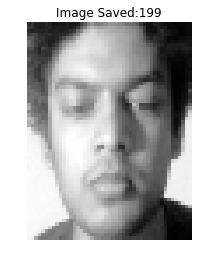

In [16]:
import os
from IPython.display import clear_output

%matplotlib inline

cam = cv2.VideoCapture(0)

folder = 'people/'+input('Person:').lower()

if not os.path.exists(folder):
    os.mkdir(folder)
    
    flag_start_capturing = False
    sample = 1
    cv2.namedWindow('Face', cv2.WINDOW_AUTOSIZE)
    
    while True:
        ret, frame = cam.read()
        
        
        face_coord = detect_face(frame)
        
        if len(face_coord):
            faces = normalize_faces(frame, face_coord)
            cv2.imwrite(folder+'/'+str(sample)+'.jpg', faces[0])
            plot_show(faces[0], 'Image Saved:'+str(sample))
            clear_output(wait=True)
            
        if flag_start_capturing==True:
            sample+=1
            
        draw_rectangle(frame, face_coord)
        cv2.imshow('Face', frame)
        keypress = cv2.waitKey(1)
        
        if keypress == ord('c'):
            
            if flag_start_capturing==False:
                flag_start_capturing = True
                
        if sample == 200:
            break
            
    cam.release()
    cv2.destroyAllWindows()
else:
    print('This name already exists.')

In [17]:
cam.release()

In [18]:
basepath = '/Users/lalg/scikit_learn_data/lfw_home/lfw_funneled'
images = os.listdir(basepath)
print(len(images))
data = images[:210]
for i, folder in enumerate(data, start=1):
    files = os.listdir(basepath+'/'+folder)
    for k, img in enumerate(files, start=1):
        if img.endswith('.jpg'):
            frame=cv2.imread(basepath+'/'+folder+'/'+img,0)
            
            faces_coord = detect_face(frame)
            if len(faces_coord):
                faces = cut_faces(frame, faces_coord)
                faces = normalize_intensity(faces)
                faces = resize_face(faces)
                cv2.imwrite('people/unknown/'+str(i)+'.jpg',faces[0])
                
                break


1882


In [19]:
#collect dataset
def collect_dataset():
    images = []
    labels = []
    labels_dic = {}
    people = [person for person in os.listdir('people/')]
    #print(type(images))
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir('people/'+person):
            if image.endswith('.jpg'):
                images.append(cv2.imread('people/'+person+'/'+image,0))
                #print(len(images))
                labels.append(i)
    return (images, np.array(labels), labels_dic)

# def collect_dataset():
#     images = []
#     labels = []
#     labels_dic = {}
#     #people = [person for person in os.listdir("Male_female/")]
#     people = [person for person in os.listdir("people/")]
#     #people = [person for person in os.listdir("people/")]
#     for i, person in enumerate(people):
#         labels_dic[i] = person
#         for image in os.listdir("people/" + person):
#             if image.endswith('.jpg'):
#                 images.append(cv2.imread("people/" + person + '/' + image, 0))
#                 labels.append(i)
#     return (images, np.array(labels), labels_dic)

In [20]:
images, labels, labels_dic = collect_dataset()
print(np.array(labels), labels_dic)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] {0: 'ravi', 1: 'unknown'}


In [21]:
print(len(images))

401


In [22]:
X_train = np.asarray(images)
X_train.shape
train = X_train.reshape(len(X_train), -1)
X_train.shape
train.shape

(401, 2914)

Text(0,0.5,'Cummulative Explained Variance')

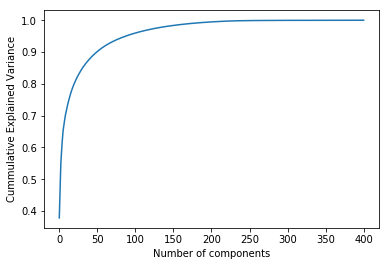

In [23]:
from sklearn.decomposition import PCA
pca1 = PCA()
pca1.fit(train)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cummulative Explained Variance')


In [24]:
pca = PCA(n_components=0.99)
new_train = pca.fit_transform(train)

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold

In [26]:
param_grid = {'C':[.0001,.001,.01,.1,1,10]}

In [27]:
kf = KFold(n_splits=5, shuffle=True)

In [28]:
gs_svc = GridSearchCV(SVC(kernel='linear', probability=True), param_grid=param_grid,cv=kf, scoring='accuracy')

In [29]:
gs_svc.fit(new_train, labels)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [30]:
gs_svc.best_score_

1.0

In [31]:
gs_svc.best_params_

{'C': 0.0001}

In [32]:
svc1 = gs_svc.best_estimator_
type(svc1)

sklearn.svm.classes.SVC

In [33]:
import pickle
filename = 'svc_face.pkl'
f = open(filename, 'wb')
pickle.dump(svc1, f)
f.close()

In [34]:
svc1 = pickle.load(open(filename, 'rb'))

In [37]:
cam = cv2.VideoCapture(0)
font=cv2.FONT_HERSHEY_PLAIN
cv2.namedWindow("opencv_face", cv2.WINDOW_AUTOSIZE)



while True:
    ret,frame = cam.read()
    print(type(frame))
    
    
    faces_coord = detect_face(frame) # detect more than one face
    if len(faces_coord):
        faces = normalize_faces(frame, faces_coord)
        #faces = normalize_intensity(faces)
        for i, face in enumerate(faces): # for each detected face
            
            
            #cv2.imwrite('trainingData/female/picture_BGR5.jpg',face)
            test = pca.transform(face.reshape(1,-1))    
            #print test
            #transform = test.reshape(1,-1)
            #print transform
            prob=svc1.predict_proba(test)
            confidence = svc1.decision_function(test)
            print (confidence)
            print (prob)
           
            
            
            pred = svc1.predict(test)
            print (pred,pred[0])
           
            name=labels_dic[pred[0]].capitalize()
            print (name, prob)
            
            #pred = labels_dic[pred[0]].capitalize()
            #threshold = .50
            #print()
            if prob[0][1]>.40:
                
                cv2.putText(frame, name,(faces_coord[i][0], faces_coord[i][1] - 10),
                            cv2.FONT_HERSHEY_PLAIN, 2, (66, 53, 243), 2)
            
                
            elif prob[0][1]>.50:
                cv2.putText(frame,'unknown',(faces_coord[i][0], faces_coord[i][1] - 10),
                            cv2.FONT_HERSHEY_PLAIN, 3, (66, 53, 243), 2)
                
                
            #cv2.putText(frame,name,(x,y-10),font,2,(0,0,255),2,cv2.LINE_AA)
            
               
           #cv2.putText(frame,'Unknown',(x,y-10),font,2,(0,0,255),2,cv2.LINE_AA)
        clear_output(wait = True)
        draw_rectangle(frame, faces_coord) # rectangle around face
        
    cv2.putText(frame, "a to exit", (5, frame.shape[0] - 5),cv2.FONT_HERSHEY_PLAIN, 1.3, (66, 53, 243), 2,
                cv2.LINE_AA)
    
    cv2.imshow("opencv_face", frame) # live feed in external
    if cv2.waitKey(5) == 97:
        break
        
cam.release()
cv2.destroyAllWindows()
        

<class 'numpy.ndarray'>
[-0.97559773]
[[0.98225322 0.01774678]]
[0] 0
Ravi [[0.98225322 0.01774678]]


In [38]:
cam.release()